# 5.2 - Random Forest

Random Forest é um algoritmo de aprendizado de máquina comumente usado, registrado por Leo Breiman e Adele Cutler, que combina a saída de várias árvores de decisão para chegar a um único resultado. Sua facilidade de uso e flexibilidade impulsionaram sua adoção, uma vez que lida com problemas de classificação e regressão.

While decision trees are common supervised learning algorithms, they can be prone to problems, such as bias and overfitting. However, when multiple decision trees form an ensemble in the random forest algorithm, they predict more accurate results, particularly when the individual trees are uncorrelated with each other.

**Ensemble Methods**

Os métodos de aprendizagem do conjunto são compostos por um conjunto de classificadores - por exemplo, árvores de decisão - e suas previsões são agregadas para identificar o resultado mais popular. Os métodos de conjunto mais conhecidos são bagging, também conhecido como agregação de bootstrap, e boosting. Em 1996, Leo Breiman introduziu o método de ensacamento; neste método, uma amostra aleatória de dados em um conjunto de treinamento é selecionada com substituição - o que significa que os pontos de dados individuais podem ser escolhidos mais de uma vez. Depois que várias amostras de dados são geradas, esses modelos são treinados de forma independente e dependendo do tipo de tarefa - ou seja, regressão ou classificação - a média ou a maioria dessas previsões produzem uma estimativa mais precisa. Essa abordagem é comumente usada para reduzir a variação em um conjunto de dados ruidoso.

**Random forest algorithm**

O algoritmo de floresta aleatória é uma extensão do método de ensacamento, pois utiliza ensacamento e aleatoriedade de recursos para criar uma floresta não correlacionada de árvores de decisão. A aleatoriedade de recursos, também conhecida como bagging de recursos ou “o método do subespaço aleatório”, gera um subconjunto aleatório de recursos, que garante baixa correlação entre as árvores de decisão. Esta é uma diferença fundamental entre árvores de decisão e florestas aleatórias. Enquanto as árvores de decisão consideram todas as divisões de recursos possíveis, as florestas aleatórias selecionam apenas um subconjunto desses recursos.

## Como funciona

Os algoritmos de floresta aleatória têm três hiperparâmetros principais, que precisam ser definidos antes do treinamento. Isso inclui o tamanho do nó, o número de árvores e o número de recursos amostrados. A partir daí, o classificador de floresta aleatório pode ser usado para resolver problemas de regressão ou classificação.

O algoritmo de floresta aleatória é composto por uma coleção de árvores de decisão, e cada árvore do conjunto é composta por uma amostra de dados retirada de um conjunto de treinamento com substituição, chamada de amostra bootstrap. Dessa amostra de treinamento, um terço é reservado como dados de teste, conhecido como amostra out-of-bag (oob), à qual voltaremos mais tarde. Outra instância de aleatoriedade é então injetada por meio do empacotamento de recursos, adicionando mais diversidade ao conjunto de dados e reduzindo a correlação entre as árvores de decisão. Dependendo do tipo de problema, a determinação da previsão irá variar. Para uma tarefa de regressão, será calculada a média das árvores de decisão individuais e, para uma tarefa de classificação, uma votação majoritária - ou seja. a variável categórica mais frequente - produzirá a classe prevista. Finalmente, a amostra oob é então usada para validação cruzada, finalizando essa previsão.

![fig_1](https://i.ibb.co/VJVqhnc/random-forest-drawio.png)



## Vantagens

* As florestas aleatórias são consideradas um método altamente preciso e robusto devido ao número de árvores de decisão que participam do processo.
* Ele não sofre do problema de overfitting. A principal razão é que leva a média de todas as previsões, o que cancela os vieses.
* O algoritmo pode ser usado em problemas de classificação e regressão.
* Florestas aleatórias também podem lidar com valores ausentes. Existem duas maneiras de lidar com isso: usando valores medianos para substituir variáveis contínuas e computando a média ponderada por proximidade de valores ausentes.
* Você pode obter a importância relativa do recurso, o que ajuda a selecionar os recursos que mais contribuem para o classificador.

## Desvantagens

* As florestas aleatórias demoram a gerar previsões porque têm várias árvores de decisão. Sempre que faz uma previsão, todas as árvores na floresta têm que fazer uma previsão para o mesmo dado de entrada e, em seguida, votar nela. Todo esse processo é demorado.
* O modelo é difícil de interpretar em comparação com uma árvore de decisão, onde você pode facilmente tomar uma decisão seguindo o caminho na árvore.

## Em Python

### Importando bibliotecas

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

# carregando os conjunto de dados
iris = datasets.load_iris()

Vamos verificar o alvo e os features.

In [5]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] 
y=data['species']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [9]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Encontrando recursos importantes no Scikit-learn

Aqui, você encontra recursos importantes ou seleciona recursos no conjunto de dados IRIS. No scikit-learn, você pode executar essa tarefa nas seguintes etapas:

* Primeiro, você precisa criar um modelo de floresta aleatório.
* Em segundo lugar, use a variável de importância do recurso para ver as pontuações de importância do recurso.
* Terceiro, visualize essas pontuações usando a biblioteca marítima.

In [10]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.489625
petal width (cm)     0.364376
sepal length (cm)    0.120944
sepal width (cm)     0.025055
dtype: float64

No handles with labels found to put in legend.


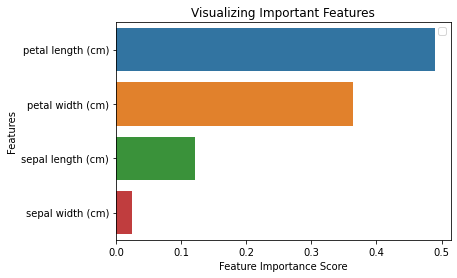

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Gerando o modelo em recursos selecionados

Vamos remover "sepal width (cm)" por apresentar uma importância muito baixa.

In [13]:
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [14]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
